In [1]:
#import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

#hide warning messages
import warnings
warnings.filterwarnings('ignore')

#read csv data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

## Clean and Combine Data

In [2]:
#check Mouse ID column
mouse_drug_data["Mouse ID"].value_counts() #g989 has 2 entries, maximum of 1
clinical_trial_data["Mouse ID"].value_counts() #g989 has 13 entries, maximum of 10

#locate the g989 rows in the drug data
g989Drug = mouse_drug_data.loc[mouse_drug_data["Mouse ID"] == "g989", :]
g989Drug #each g989 has a diffrent drug: stelasyn, propriva

#locate the g989 rows in the clinical data
g989Trial = clinical_trial_data.loc[clinical_trial_data["Mouse ID"] == "g989", :]
g989Trial #g989 has 2 simultaneous timelines, unable to parse which timeline corresponds to which drug

#remove g989 data from both data sets
clean_mouse_drug_data = mouse_drug_data.loc[mouse_drug_data["Mouse ID"] != "g989", :]
clean_clinical_trial_data = clinical_trial_data.loc[clinical_trial_data["Mouse ID"] != "g989", :]

#merge data tables
drugData = pd.merge(clean_mouse_drug_data, clean_clinical_trial_data, on="Mouse ID", how="outer")
drugData.head(20)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [3]:
#group data by drug and timepoint 
groupedDrugData = drugData.groupby(["Drug", "Timepoint"])

#find avg tumor volume and metastic sites for each drug at each timepoint
drugAvgs = groupedDrugData.mean()
drugAvgs.head(15)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111

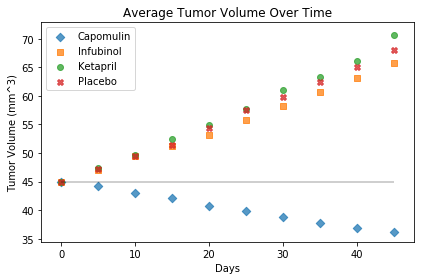

In [4]:
#list drugs to examine
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
#list timepoints
timepoints = np.arange(0, 50, 5)

#list tumor vol avg by drug and timepoint
tumorVolAvg = drugAvgs["Tumor Volume (mm3)"]
#separate tumor vol avg list by drug
capo_tumorVolAvg = tumorVolAvg.loc["Capomulin", :]
infu_tumorVolAvg = tumorVolAvg.loc["Infubinol", :]
keta_tumorVolAvg = tumorVolAvg.loc["Ketapril", :]
plac_tumorVolAvg = tumorVolAvg.loc["Placebo", :]

#plot each drug's tumor vol avg over time
capo_tumorVolAvgPlot = plt.scatter(timepoints, capo_tumorVolAvg, marker = "D", label = "Capomulin", alpha = .75)
infu_tumorVolAvgPlot = plt.scatter(timepoints, infu_tumorVolAvg, marker = "s", label = "Infubinol", alpha = .75)
keta_tumorVolAvgPlot = plt.scatter(timepoints, keta_tumorVolAvg, marker = "o", label = "Ketapril", alpha = .75)
plac_tumorVolAvgPlot = plt.scatter(timepoints, plac_tumorVolAvg, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

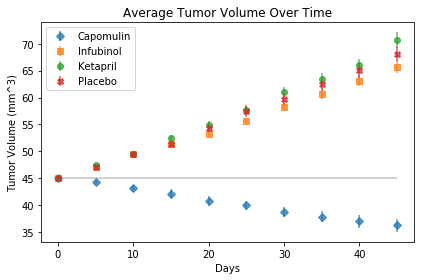

In [5]:
#find std errors for each drug and timepoint
tumorStdErrors = [stats.sem(drugData.loc[(drugData["Drug"] == drug) 
                                         & (drugData["Timepoint"] == time), "Tumor Volume (mm3)"]) 
                  for drug in drugList for time in timepoints]

#separate std errors by drug
capo_tumorStdErrors = [tumorStdErrors[i] for i in range(10)]
infu_tumorStdErrors = [tumorStdErrors[i] for i in range(10, 20)]
keta_tumorStdErrors = [tumorStdErrors[i] for i in range(20, 30)]
plac_tumorStdErrors = [tumorStdErrors[i] for i in range(30, 40)]

#plot tumor vol avg with std error bars
capo_tumorErrorPlot = plt.errorbar(timepoints, capo_tumorVolAvg, capo_tumorStdErrors, marker = "D", linestyle="None", label = "Capomulin", alpha = .75)
infu_tumorErrorPlot = plt.errorbar(timepoints, infu_tumorVolAvg, infu_tumorStdErrors, marker = "s", linestyle="None", label = "Infubinol", alpha = .75)
keta_tumorErrorPlot = plt.errorbar(timepoints, keta_tumorVolAvg, keta_tumorStdErrors, marker = "o", linestyle="None", label = "Ketapril", alpha = .75)
plac_tumorErrorPlot = plt.errorbar(timepoints, plac_tumorVolAvg, plac_tumorStdErrors, marker = "X", linestyle="None", label = "Placebo", alpha = .75)

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Metastatic Response to Treatment

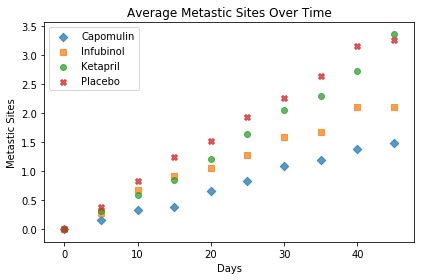

In [6]:
#list metastatic sites avg by drug and timepoint 
metastaticAvg = drugAvgs["Metastatic Sites"]

#separate metastatic avg list by drug
capo_metastaticAvg = metastaticAvg.loc["Capomulin", :]
infu_metastaticAvg = metastaticAvg.loc["Infubinol", :]
keta_metastaticAvg = metastaticAvg.loc["Ketapril", :]
plac_metastaticAvg = metastaticAvg.loc["Placebo", :]

#plot metastatic avg over time
capo_metastaticAvgPlot = plt.scatter(timepoints, capo_metastaticAvg, marker = "D", label = "Capomulin", alpha = .75)
infu_metastaticAvgPlot = plt.scatter(timepoints, infu_metastaticAvg, marker = "s", label = "Infubinol", alpha = .75)
keta_metastaticAvgPlot = plt.scatter(timepoints, keta_metastaticAvg, marker = "o", label = "Ketapril", alpha = .75)
plac_metastaticAvgPlot = plt.scatter(timepoints, plac_metastaticAvg, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Average Metastic Sites Over Treatment")
plt.xlabel("Days")
plt.ylabel("Metastic Sites")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

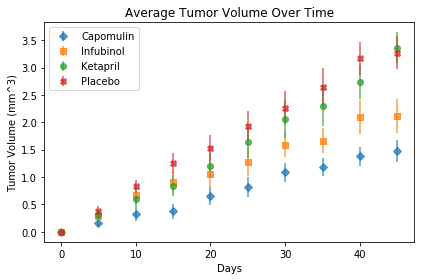

In [7]:
#find std errors for each drug and timepoint
metastaticStdErrors = [stats.sem(drugData.loc[(drugData["Drug"] == drug) 
                                         & (drugData["Timepoint"] == time), "Metastatic Sites"]) 
                  for drug in drugList for time in timepoints]

#separate std errors by drug
capo_metastaticStdErrors = [metastaticStdErrors[i] for i in range(10)]
infu_metastaticStdErrors = [metastaticStdErrors[i] for i in range(10, 20)]
keta_metastaticStdErrors = [metastaticStdErrors[i] for i in range(20, 30)]
plac_metastaticStdErrors = [metastaticStdErrors[i] for i in range(30, 40)]

#plot metastatic avg with error bars
capo_metastaticErrorPlot = plt.errorbar(timepoints, capo_metastaticAvg, capo_metastaticStdErrors, marker = "D", linestyle="None", label = "Capomulin", alpha = .75)
infu_metastaticErrorPlot = plt.errorbar(timepoints, infu_metastaticAvg, infu_metastaticStdErrors, marker = "s", linestyle="None", label = "Infubinol", alpha = .75)
keta_metastaticErrorPlot = plt.errorbar(timepoints, keta_metastaticAvg, keta_metastaticStdErrors, marker = "o", linestyle="None", label = "Ketapril", alpha = .75)
plac_metastaticErrorPlot = plt.errorbar(timepoints, plac_metastaticAvg, plac_metastaticStdErrors, marker = "X", linestyle="None", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Average Tumor Volume Over Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm^3)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Survival Rates

In [22]:
#find mouse count
drugCounts = groupedDrugData.count()
mouseCounts = drugCounts["Mouse ID"]
#list mouse count by drug and timepoint
mouseCounts = pd.DataFrame(mouseCounts)
mouseCounts = mouseCounts.rename(columns={"Mouse ID": "Mouse Count"})
mouseCounts.head(15)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18

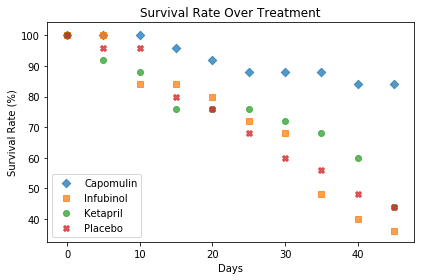

In [30]:
#separate mouse count list by drug
capo_mouseCounts = mouseCounts.loc["Capomulin", :]
infu_mouseCounts = mouseCounts.loc["Infubinol", :]
keta_mouseCounts = mouseCounts.loc["Ketapril", :]
plac_mouseCounts = mouseCounts.loc["Placebo", :]

#convert mouse counts to % of starting mice
capo_survivalPerc = capo_mouseCounts / capo_mouseCounts.iloc[0, 0] * 100
infu_survivalPerc = infu_mouseCounts / infu_mouseCounts.iloc[0, 0] * 100
leta_survivalPerc = keta_mouseCounts / keta_mouseCounts.iloc[0, 0] * 100
plac_survivalPerc = plac_mouseCounts / plac_mouseCounts.iloc[0, 0] * 100

#plot each drug's mouse count over time
capo_tumorVolAvgPlot = plt.scatter(timepoints, capo_survivalPerc, marker = "D", label = "Capomulin", alpha = .75)
infu_tumorVolAvgPlot = plt.scatter(timepoints, infu_survivalPerc, marker = "s", label = "Infubinol", alpha = .75)
keta_tumorVolAvgPlot = plt.scatter(timepoints, leta_survivalPerc, marker = "o", label = "Ketapril", alpha = .75)
plac_tumorVolAvgPlot = plt.scatter(timepoints, plac_survivalPerc, marker = "X", label = "Placebo", alpha = .75)

#formatting and titles
plt.title("Survival Rate Over Treatment")
plt.xlabel("Days")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#add linear regression lines?

## Summary Bar Graph

In [79]:
# Calculate the percent changes for each drug
capo_tumorPercChange = (capo_tumorVolAvg[9] / capo_tumorVolAvg[0] * 100) - 100
infu_tumorPercChange = (infu_tumorVolAvg[9] / infu_tumorVolAvg[0] * 100) - 100
keta_tumorPercChange = (keta_tumorVolAvg[9] / keta_tumorVolAvg[0] * 100) - 100
plac_tumorPercChange = (plac_tumorVolAvg[9] / plac_tumorVolAvg[0] * 100) - 100

tumorPercList = [capo_tumorPercChange, infu_tumorPercChange, keta_tumorPercChange, plac_tumorPercChange]


tumorPercTable = pd.DataFrame({"Drug": drugList, "Tumor Percent Change": tumorPercList})
tumorPercTable

passFailBins = [min(tumorPercList) - 1, 0, max(tumorPercList) + 1]
passFailLabels = ["Pass", "Fail"]

tumorPercTable["Treatment Status"] = pd.cut(tumorPercTable["Tumor Percent Change"], passFailBins, labels = passFailLabels)
tumorPercTable


,Drug,Tumor Percent Change,Treatment Status
0,Capomulin,-19.475303,Pass
1,Infubinol,46.123472,Fail
2,Ketapril,57.028795,Fail
3,Placebo,51.297960,Fail


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

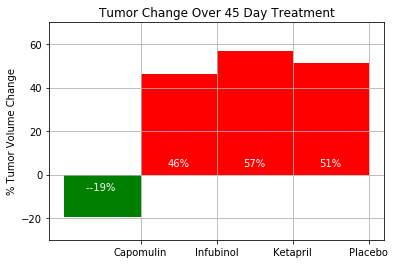